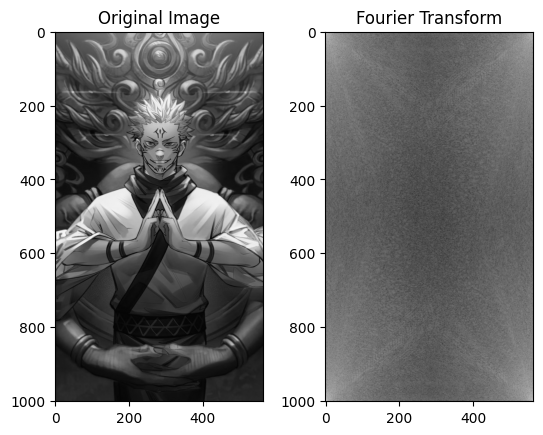

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the grayscale image
img = cv2.imread('sukuna.jpg', cv2.IMREAD_GRAYSCALE)

# Compute 2D FFT
f_transform = np.fft.fft2(img)
f_transform_magnitude = np.log(1 + np.abs(f_transform))

# # Display original image and frequency domain representation
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(f_transform_magnitude, cmap='gray'), plt.title('Fourier Transform')
plt.show()

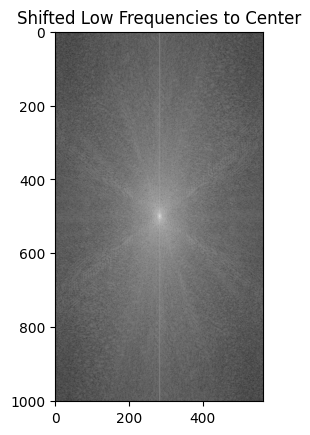

In [ ]:
#Shift Low-Frequency Components to Center
f_shift = np.fft.fftshift(f_transform)
f_shift_magnitude = np.log(1 + np.abs(f_shift))

plt.imshow(f_shift_magnitude, cmap='gray')
plt.title('Shifted Low Frequencies to Center')
plt.show()

In [3]:
#Create an Ideal Low-Pass Filter
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# Create mask with a circle at the center
mask = np.zeros((rows, cols), np.uint8)
radius = 50  # Define cutoff frequency
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

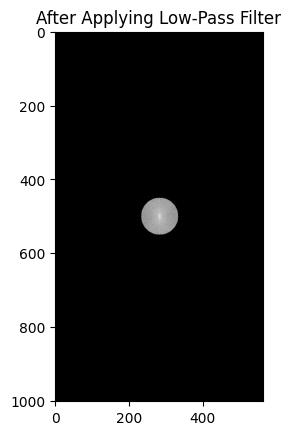

In [4]:
#Apply Low-Pass Filter and Smooth Image
f_low_pass = f_shift * mask
f_low_pass_magnitude = np.log(1 + np.abs(f_low_pass))

plt.imshow(f_low_pass_magnitude, cmap='gray')
plt.title('After Applying Low-Pass Filter')
plt.show()


Justification: Why High-Frequency Components Are Removed

    High frequencies represent sharp changes (edges, noise).
    Low-pass filtering retains only smooth transitions, blurring edges.
    This is evident from the transformed image losing fine details.

In [5]:
#Decentralize the Low-Frequency Components
f_low_pass_shifted = np.fft.ifftshift(f_low_pass)

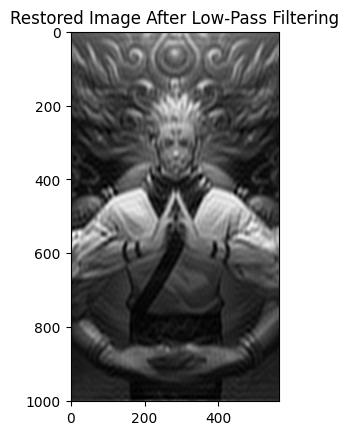

In [7]:
#Apply Inverse Fourier Transform
img_restored = np.fft.ifft2(f_low_pass_shifted)
img_restored = np.abs(img_restored)

plt.imshow(img_restored, cmap='gray')
plt.title('Restored Image After Low-Pass Filtering')
plt.show()


In [8]:
#Create an Ideal High-Pass Filter
mask_high = 1 - mask

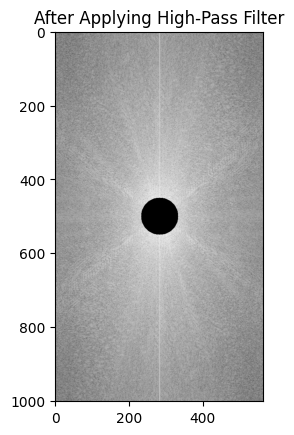

In [9]:
#Apply High-Pass Filter and Retain Only High Frequencies
f_high_pass = f_shift * mask_high
f_high_pass_magnitude = np.log(1 + np.abs(f_high_pass))

plt.imshow(f_high_pass_magnitude, cmap='gray')
plt.title('After Applying High-Pass Filter')
plt.show()


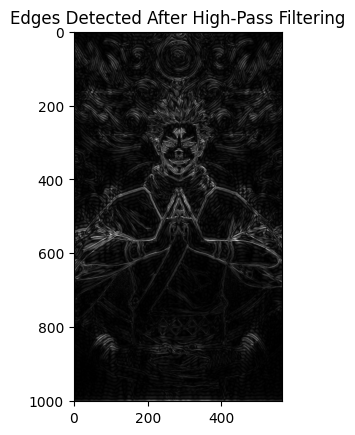

In [10]:
#Decentralize and Apply Inverse Fourier Transform
f_high_pass_shifted = np.fft.ifftshift(f_high_pass)
img_high_edges = np.fft.ifft2(f_high_pass_shifted)
img_high_edges = np.abs(img_high_edges)

plt.imshow(img_high_edges, cmap='gray')
plt.title('Edges Detected After High-Pass Filtering')
plt.show()